
<img src="res/viu_logo.png" width="200">

## 01MIAR - Actividad Final
### Nombre: Mayra Pullupaxi


## Indice
1. Importación de librerías
2. Obtención de dataset
3. Tratamiento de datos
4. Análisis y gráficos de datos
5. Conclusiones

## Objetivo
Aplicar los conocimientos obtenidos los largo del curso con un dataset propio o de internet.

## Introducción
Se ha escogido un dataset de entrenimiento actual para mi, en este caso sobre una serie animada llamada Pokemon, esto debido a que en mi entorno hay muchos niños, quienes mencionan mucho los personajes, sus evoluciones, fuerza de ataque y otras habilidades propias de estos personajes, y con la ayuda del dataset se podrá mostrar el análisis de resultados y gráficos y de esta manera los aficionados a esta serie puedan elegir que Pokemon tiene más poder de ataque o defensa y cual podría obtener victoria.

### Desarrollo de la actividad


### 1. Importación de librerías
- Primero se importan las librerías necesarias

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### 2. Obtención del dataset
- Luego se obtiene la ruta y los datos del archivo csv, previamente descargado de la ruta: https://www.kaggle.com/abcsds/pokemon?select=Pokemon.csv

In [2]:
ruta_datos = os.path.join('res', 'Pokemon.csv')
datos = pd.read_csv(ruta_datos, sep=',')

- Se carga de los datos en el dataframe con las columnas a usar

In [3]:
datos_pokemon = datos[['Name','Type 1','Type 2','Total','HP','Attack','Defense','Speed','Sp. Atk','Sp. Def','Legendary','Generation']]
display(datos_pokemon.head())

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Speed,Sp. Atk,Sp. Def,Legendary,Generation
0,Bulbasaur,Grass,Poison,318,45,49,49,45,65,65,False,1
1,Ivysaur,Grass,Poison,405,60,62,63,60,80,80,False,1
2,Venusaur,Grass,Poison,525,80,82,83,80,100,100,False,1
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,80,122,120,False,1
4,Charmander,Fire,NaN,309,39,52,43,65,60,50,False,1


- También se observará el tipo de datos que contiene el dataframe

In [65]:
datos_pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              800 non-null    object
 1   Type_1            800 non-null    object
 2   Type_2            414 non-null    object
 3   Total             800 non-null    int64 
 4   Hit_points        800 non-null    int64 
 5   Attack            800 non-null    int64 
 6   Defense           800 non-null    int64 
 7   Speed             800 non-null    int64 
 8   Attack_superior   800 non-null    int64 
 9   Defense_superior  800 non-null    int64 
 10  Legendary         800 non-null    bool  
 11  Generation        800 non-null    int64 
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


### 3. Tratamiento de datos
- Una vez cargada la información, vamos a limpiar datos innecesarios y validar que campos son nulos

In [5]:
#Permite eliminar filas q estén vacías
datos_pokemon.dropna(axis=0, how='all')

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Speed,Sp. Atk,Sp. Def,Legendary,Generation
0,Bulbasaur,Grass,Poison,318,45,49,49,45,65,65,False,1
1,Ivysaur,Grass,Poison,405,60,62,63,60,80,80,False,1
2,Venusaur,Grass,Poison,525,80,82,83,80,100,100,False,1
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,80,122,120,False,1
4,Charmander,Fire,NaN,309,39,52,43,65,60,50,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...
795,Diancie,Rock,Fairy,600,50,100,150,50,100,150,True,6
796,DiancieMega Diancie,Rock,Fairy,700,50,160,110,110,160,110,True,6
797,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,70,150,130,True,6
798,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,80,170,130,True,6


- Se renombra las columnas para que sea más entendible

In [6]:
datos_pokemon = datos_pokemon.copy()
datos_pokemon.rename(columns={'Type 1':'Type_1','Type 2':'Type_2','HP':'Hit_points','Sp. Atk':'Attack_superior',
                              'Sp. Def':'Defense_superior'}, inplace=True)
display(datos_pokemon.head())

,Name,Type_1,Type_2,Total,Hit_points,Attack,Defense,Speed,Attack_superior,Defense_superior,Legendary,Generation
0,Bulbasaur,Grass,Poison,318,45,49,49,45,65,65,False,1
1,Ivysaur,Grass,Poison,405,60,62,63,60,80,80,False,1
2,Venusaur,Grass,Poison,525,80,82,83,80,100,100,False,1
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,80,122,120,False,1
4,Charmander,Fire,NaN,309,39,52,43,65,60,50,False,1


### 4. Análisis y Gráficos de Datos
- Una vez tratados los datos empezamos con el análisis

Primero se determinará el número por tipo de Pokemon que existen

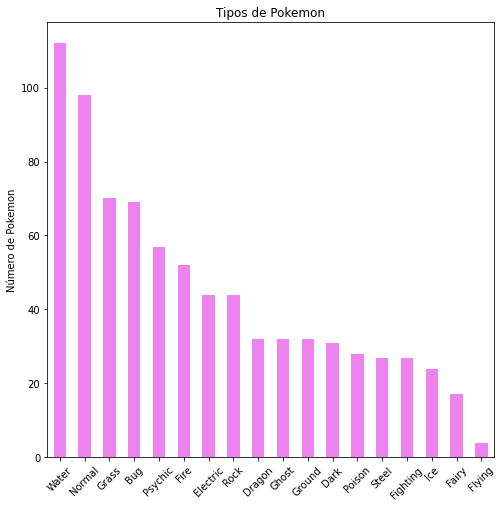

In [7]:
tipo_pokemon = datos_pokemon["Type_1"].value_counts()

tipo_pokemon.plot(kind='bar', title='Tipos de Pokemon', color='violet', figsize=(8, 8))
plt.ylabel("Número de Pokemon")
plt.xticks(rotation=45)
plt.show()

Según el gráfico se puede observar que los Pokemon con más tipos son de Agua, seguidos por los Normales y de Planta y el que tiene menos tipos son los Voladores

Luego, un punto interesante en esta serie animada es conocer que tipos de Pokemon son los que tienen mayor puntuación en su ataque y defensa para saber cuales usar en las peleas que realizan. Por esta razón vamos a realizar un análisis para obtener la media para los ataques, defensas, puntos de golpe y velocidad de los tipos de Pokemon.

,Attack,Attack_superior,Defense,Defense_superior,Hit_points,Speed,Total
Type_1,,,,,,,
Bug,70.971014,53.869565,70.724638,64.797101,56.884058,61.681159,378.927536
Dark,88.387097,74.645161,70.225806,69.516129,66.806452,76.161290,445.741935
Dragon,112.125000,96.843750,86.375000,88.843750,83.312500,83.031250,550.531250
Electric,69.090909,90.022727,66.295455,73.704545,59.795455,84.500000,443.409091
Fairy,61.529412,78.529412,65.705882,84.705882,74.117647,48.588235,413.176471


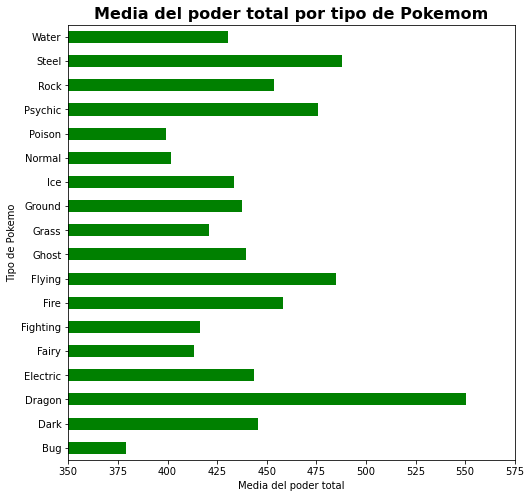

In [8]:
#Se obtiene la media por cada tipo de Pokemon, para eso usamos pivot table donde creamos una tabla dinámica y asignamos 
#como índices el tipo de Pokemon
datos_media = datos_pokemon.pivot_table(index='Type_1', values=['Total','Attack', 'Defense', 'Hit_points', 'Attack_superior', 
                                                                'Defense_superior', 'Speed'], aggfunc='mean')
display(datos_media.head())

#Se realiza el gráfico de la media del total por tipo de Pokemon
datos_media.plot(kind='barh', y='Total', figsize=(8, 8),color='green', legend=False)
plt.xlim((350, 575))
plt.xlabel('Media del poder total')
plt.ylabel('Tipo de Pokemo')
plt.title('Media del poder total por tipo de Pokemom', fontsize=16, weight='bold')
plt.show()

De la gráfica se puede decir que la media más alta del poder del Pokemon es para el tipo Dragon. A continuación se muestra la gráfica de las medias calculadas en el punto anterior y graficadas cada una de ellas.

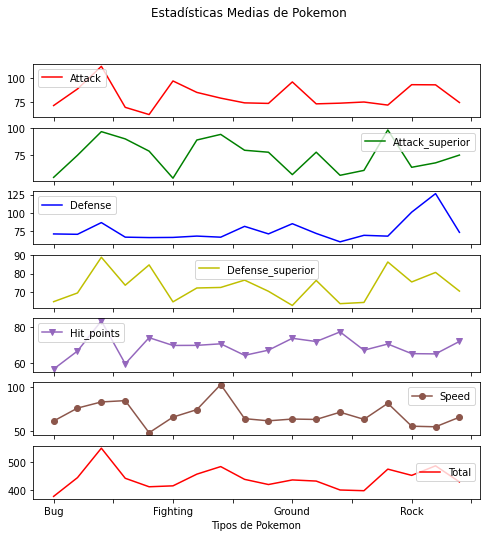

In [9]:
#Permite graficar cada media
datos_media.plot(style=['r-','g-','b-','y-','v-','o-','r-'], title='Estadísticas Medias de Pokemon', subplots=True, figsize=(8, 8))
plt.legend(loc = 'right')
plt.xlabel('Tipos de Pokemon')
plt.show()

Otro punto interesante a ser analizado es si el Pokemon es legendario, asimismo tenemos el campo de generaciones y lo podemos relacionar de tal manera que se obtiene lo legendario a lo largo de cada generación

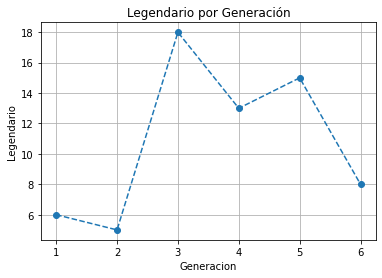

In [10]:
#Permite obtener la agrupación de Generation por lo legendario que sea
datos_legendario = datos_pokemon.groupby('Generation').sum()['Legendary']

datos_legendario.plot(kind= 'line', linestyle= 'dashed', marker= 'o')
plt.ylabel('Legendario')
plt.xlabel('Generacion')
plt.title('Legendario por Generación')
plt.grid()
plt.show()

En base al punto de visualizar lo legendario de los Pokemon, en general tenemos la proporción de Pokemon Legendarios en todo el conjunto de datos

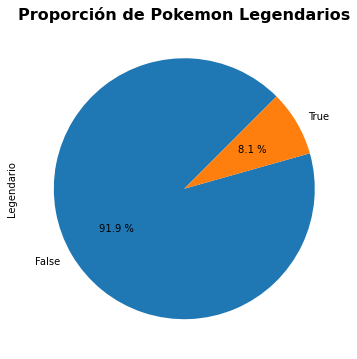

In [11]:
datos_proporcion = datos_pokemon['Legendary'].value_counts()
datos_proporcion.plot.pie(startangle=45, autopct='%.1f %%', figsize=(8, 6))

plt.title("Proporción de Pokemon Legendarios", fontsize=16, weight="bold")
plt.ylabel('Legendario')
plt.show()

En el siguiente gráfico se puede visualizar el nivel de ataque y de defensa de los Pokemon

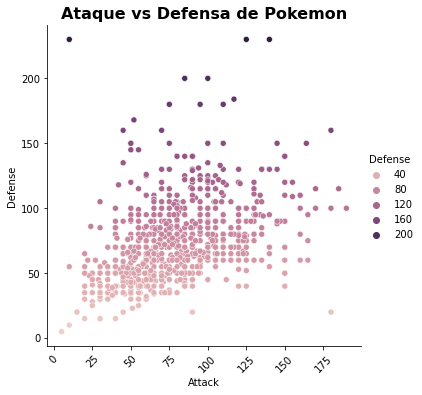

In [12]:
#Permite realizar gráficos de dispersión
sns.relplot(x='Attack', y='Defense', hue='Defense', data=datos_pokemon, kind='scatter')
plt.xticks(rotation=45)
plt.title('Ataque vs Defensa de Pokemon', fontsize=16, weight="bold")
plt.show()

Ahora se ve cuales son los Pokemon que tienen más poder de ataque y defensa y se marcan en el gráfico propuesto

230    Pokemon con mayor Defensa: Shuckle
Name: Name, dtype: object
429    Pokemon con mayor Ataque: DeoxysAttack Forme
Name: Name, dtype: object


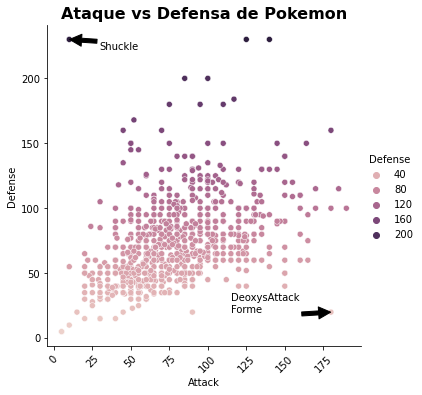

In [18]:
sns.relplot(x='Attack', y='Defense', hue='Defense', data=datos_pokemon, kind='scatter')
plt.xticks(rotation=45)
plt.title('Ataque vs Defensa de Pokemon', fontsize=16, weight="bold")

#Se asigna los nombres según según los datos de la imagen anterior
datos_defensa = datos_pokemon[(datos_pokemon.Attack < 25) & (datos_pokemon.Defense > 200)]
print('Pokemon con mayor Defensa: ' + datos_defensa['Name'])

plt.annotate(datos_defensa.Name.iloc[0], xy=(datos_defensa.Attack, datos_defensa.Defense), xytext=(30, -10), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.01)),

datos_ataque = datos_pokemon[(datos_pokemon.Attack > 175) & (datos_pokemon.Defense < 50)]
print('Pokemon con mayor Ataque: ' + datos_ataque['Name'])

plt.annotate('\n'.join(datos_ataque.Name.iloc[0].split()), xy=(datos_ataque.Attack, datos_ataque.Defense), xytext=(-100, 0), 
             textcoords='offset points', arrowprops=dict(facecolor='black', shrink=0.01))

plt.show()

En este punto se empleará el Diagrama de Regresión lineal que se usa para predecir el valor de una variable en función de otra. En este caso se realiza el valor del Ataque del Pokemon vs la Velocidad y se puede observar que a medida que el valor del ataque aumenta también incrementa la velocidad pero en proporción muy baja, esto es exactamente lo que se ve en la serie animada, cuando hay peleas mientras más herramientas de ataque se tiene se sacrifica la velocidad.

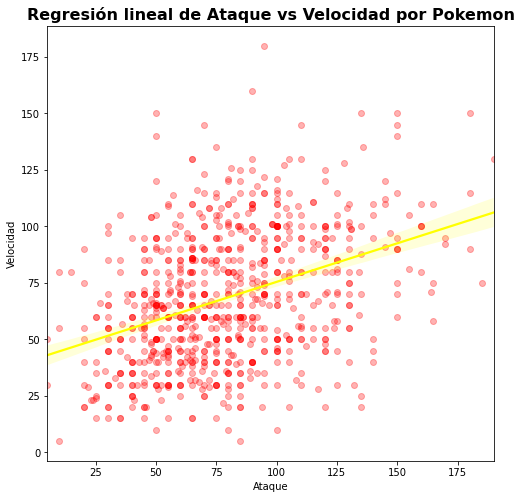

In [38]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 8)

sns.regplot(x= 'Attack', y= 'Speed', data= datos_pokemon, scatter_kws= {'color':'red', 'alpha':0.3}, line_kws={'color':'yellow'})
ax.set_title('Regresión lineal de Ataque vs Velocidad por Pokemon', fontsize=16, weight="bold")
ax.set_xlabel('Ataque')
ax.set_ylabel('Velocidad')
plt.show()

Se va a presentar un gráfico de hexágono para de la misma manera visualizar como se distribuyen los valores en este caso de defensa vs velocidad

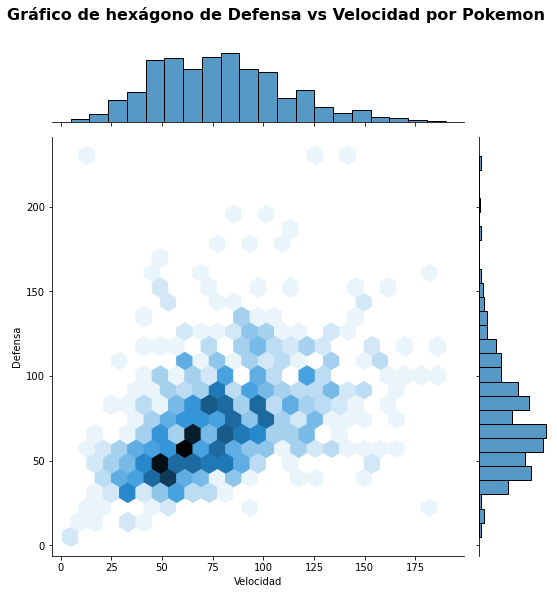

In [54]:
grafico = sns.jointplot(x="Attack", y="Defense", data=datos_pokemon, kind="hex")
grafico.fig.set_size_inches(8, 8)
grafico.fig.suptitle('Gráfico de hexágono de Defensa vs Velocidad por Pokemon', fontsize=16, weight="bold", y= 1.05)
plt.ylabel('Defensa')
plt.xlabel('Velocidad')
plt.show()

Por último se puede realizar un análisis en un gráfico de caja donde se puede observar el poder total de cada Pokemon según la generación

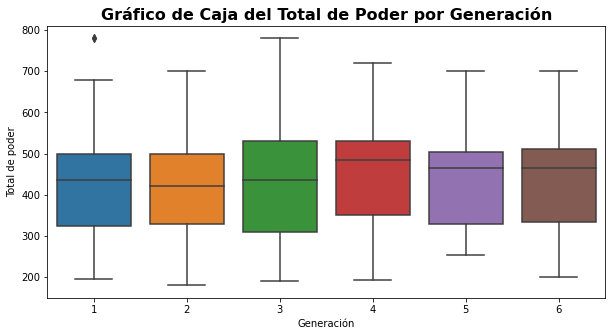

In [63]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
sns.boxplot(x='Generation', y='Total', data=datos_pokemon)
plt.title('Gráfico de Caja del Total de Poder por Generación', fontsize=16, weight="bold")
plt.ylabel('Total de poder')
plt.xlabel('Generación')
plt.show()

### 5. Conclusiones
- Se pudo aplicar conceptos aprendidos a lo largo del curso, asimismo emplear numpy y pandas para obtener datos representativos que permitan un análisis de los datos y análisis estadístico y de esta manera visualizar mejor los datos.
- Al realizar el análisis del dataset se puede concluir que se construyen varios tipos de gráficos dependiendo el interés de la data, por ejemplo al tener datos de Ataque, Defensa, Velocidad y Total de poder de los Pokemon se puede clasificar que tipo de Pokemon tiene la media más alta la relación Ataque y Defensa como se ha realizado en el trabajo. 
- También mediante el uso de Matplotlib y Seaborn se ha podido realizar un análisis de Regresión Lineal en el cual muchos aficionados a Pokemon podrán sacar sus propias estrategias e incluso con más datos obtenidos como partidas ganadasy perdidas se podrá realizar una predicción amplia de los Pokemon que podrían ser ganadores o incluso que tipos de Pokemon usar según la generación.